In [1]:
import numpy
from scipy import signal
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import os, os.path
from scipy.io.wavfile import read as wavread
import math

import numpy as np

In [2]:
def fourier(x):
    # Get Symmetric fft
    w = signal.windows.hann(np.size(x))
    windowed = x * w
    w1 = int((x.size + 1) // 2)
    w2 = int(x.size / 2)
    fftans = np.zeros(x.size)

    # Centre to make even function
    fftans[0:w1] = windowed[w2:]
    fftans[w2:] = windowed[0:w1]
    X = fft(fftans)
    magX = abs(X[0:int(x.size // 2 + 1)])
    return magX


In [103]:
def convert_to_dB(value):
    return 20 * np.log10(np.abs(value))

In [3]:
def block_audio(x, blockSize, hopSize, fs):
    # allocate memory
    numBlocks = math.ceil(x.size / hopSize)
    xb = np.zeros([numBlocks, blockSize])

    # compute time stamps
    t = (np.arange(0, numBlocks) * hopSize) / fs
    x = np.concatenate((x, np.zeros(blockSize)), axis=0)
    for n in range(0, numBlocks):
        i_start = n * hopSize
        i_stop = np.min([x.size - 1, i_start + blockSize - 1])
        xb[n][np.arange(0, blockSize)] = x[np.arange(i_start, i_stop + 1)]
    return xb, t

In [4]:
def ToolReadAudio(cAudioFilePath):
    [samplerate, x] = wavread(cAudioFilePath)

    if x.dtype == 'float32':
        audio = x
    else:
        # change range to [-1,1)
        if x.dtype == 'uint8':
            nbits = 8
        elif x.dtype == 'int16':
            nbits = 16
        elif x.dtype == 'int32':
            nbits = 32

        audio = x / float(2 ** (nbits - 1))

    # special case of unsigned format
    if x.dtype == 'uint8':
        audio = audio - 1.
    return samplerate, audio

In [127]:
def PitchSpectralHps(X, f_s):

    # initialize
    iOrder = 5
    f_min = 300
    f = np.zeros(X.shape[1])

    iLen = int((X.shape[0] - 1) / iOrder)
    afHps = X[np.arange(0, iLen), :]
    k_min = int(round(f_min / f_s * 2 * (X.shape[0] - 1)))
    name=['Plot1.png','Plot2.png','Plot3.png','Plot4.png']
    # compute the HPS
    for j in range(1, iOrder):
        X_d = X[::(j + 1), :]
        afHps *= X_d[np.arange(0, iLen), :]
        plt.figure()
        afHps1 = convert_to_dB(afHps[:,156])
        freq = np.arange(0, afHps.shape[0])
        plt.plot(freq,afHps1)
        plt.xlabel('Frames')
        plt.ylabel('Amplitude (dB)')
        plt.title('Product Spectrums')
        plt.savefig(name[j-1])
        plt.show()
    #f = np.argmax(afHps1)
    #print(f*256)
    f = np.argmax(afHps[np.arange(k_min, afHps.shape[0])], axis=0)

    # find max index and convert to Hz
    f = (f + k_min) / (X.shape[0] - 1) * f_s / 2

    return (f)

In [97]:
path = '/Users/noelalben/Music/iTunes/iTunes Media/Music/Unknown Artist/Unknown Album/Fur Elise - Beethoven (Right Hand only) _ BEGINNER PIANO TUTORIAL + SHEET MUSIC by Betacustic 1.wav'

In [106]:
path ='/Users/noelalben/Downloads/sine440.wav'

In [107]:
fs, x = wavread(path)
x = x.flatten()
#x = x[380000:680000]
x = x/max(x)

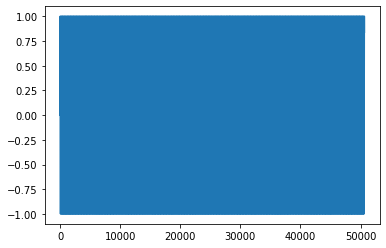

In [108]:
plt.plot(x)

In [120]:
xb,t = block_audio(x,1024,512,fs)

In [110]:
Mgx = np.zeros((xb.shape[0],513))
for block in range(xb.shape[0]):
    Mgx[block]=fourier(xb[block])

In [117]:
MgxT = Mgx.T

In [112]:
X = MgxT

In [80]:
    iOrder = 4
    f_min = 300
    f = np.zeros(X.shape[1])

    iLen = int((X.shape[0] - 1) / iOrder)
    afHps = X[np.arange(0, iLen), :]

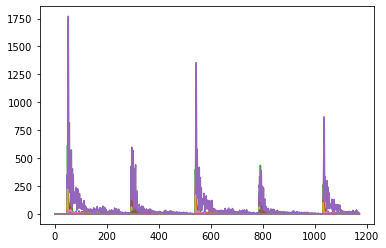

In [81]:
afHps *= X_d[np.arange(0, iLen), :]
afHpsT=afHps.T
plt.plot(afHpsT)

In [26]:
X.shape

(513, 1172)

In [27]:
afHps.shape

(128, 1172)

In [35]:
X_d = X[::(3 + 1), :]
X_d.shape

(129, 1172)

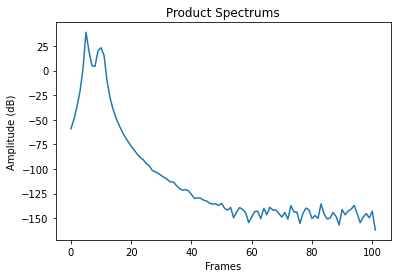

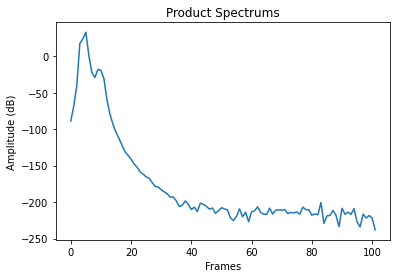

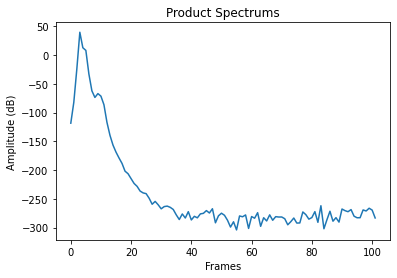

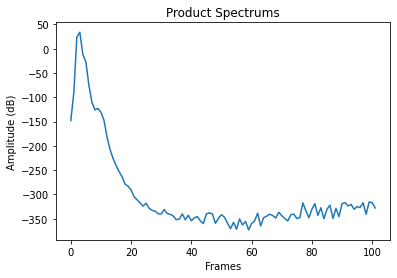

In [128]:
f = PitchSpectralHps(MgxT, fs)


In [55]:
f1 = np.array([1570.83203125, 1830.01171875, 2001.62890625, 2087.4375,2612.80078125, 2873.73046875, 3045.34765625, 3134.66015625])

In [63]:
for k in range(f1.size):
    f1[k] = int(f1[k])
f1

array([1570., 1830., 2001., 2087., 2612., 2873., 3045., 3134.])

In [92]:
1570/245

6.408163265306122

In [80]:
K =[]
for i in f1:
    K.append(f[int(i)])

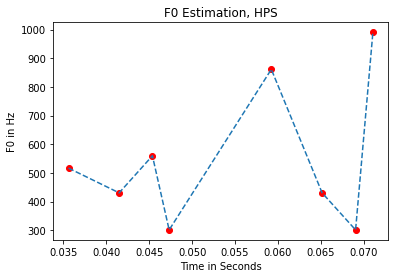

In [98]:
plt.scatter((f1/44100),K,c='r')
plt.plot((f1/44100),K,'--')
plt.title('F0 Estimation, HPS')
plt.xlabel('Time in Seconds')
plt.ylabel('F0 in Hz')
plt.savefig('/Users/noelalben/Desktop/OnsetDetection/F0.png')


In [79]:
t[1]

2